In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager

In [57]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [58]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [59]:
species

['E',
 'C3H4',
 'C2H4^+',
 'C2H2(V13)',
 'CH3',
 'C2H4(V2)',
 'H^+',
 'C3H8^+',
 'C2H2',
 'C3H7^+',
 'C2H3',
 'CH2^+',
 'C3H8(V2)',
 'H2',
 'CH4',
 'C3H7',
 'C2H5^+',
 'C2H3^+',
 'C2H4',
 'C2H2^+',
 'C3H6',
 'CH',
 'C3H8(V1)',
 'C3H8',
 'C2H2(V5)',
 'CH4^+',
 'C3H6(V)',
 'C2H2(V2)',
 'C3H6^+',
 'CH2',
 'C2H6^+',
 'CH4(V13)',
 'CH^+',
 'C3H5^+',
 'CH4(V24)',
 'C2H6',
 'C2H5',
 'C2H4(V1)',
 'CH3^+',
 'C2H6(V13)',
 'C3H4^+',
 'C2H6(V24)',
 'H',
 'C3H5']

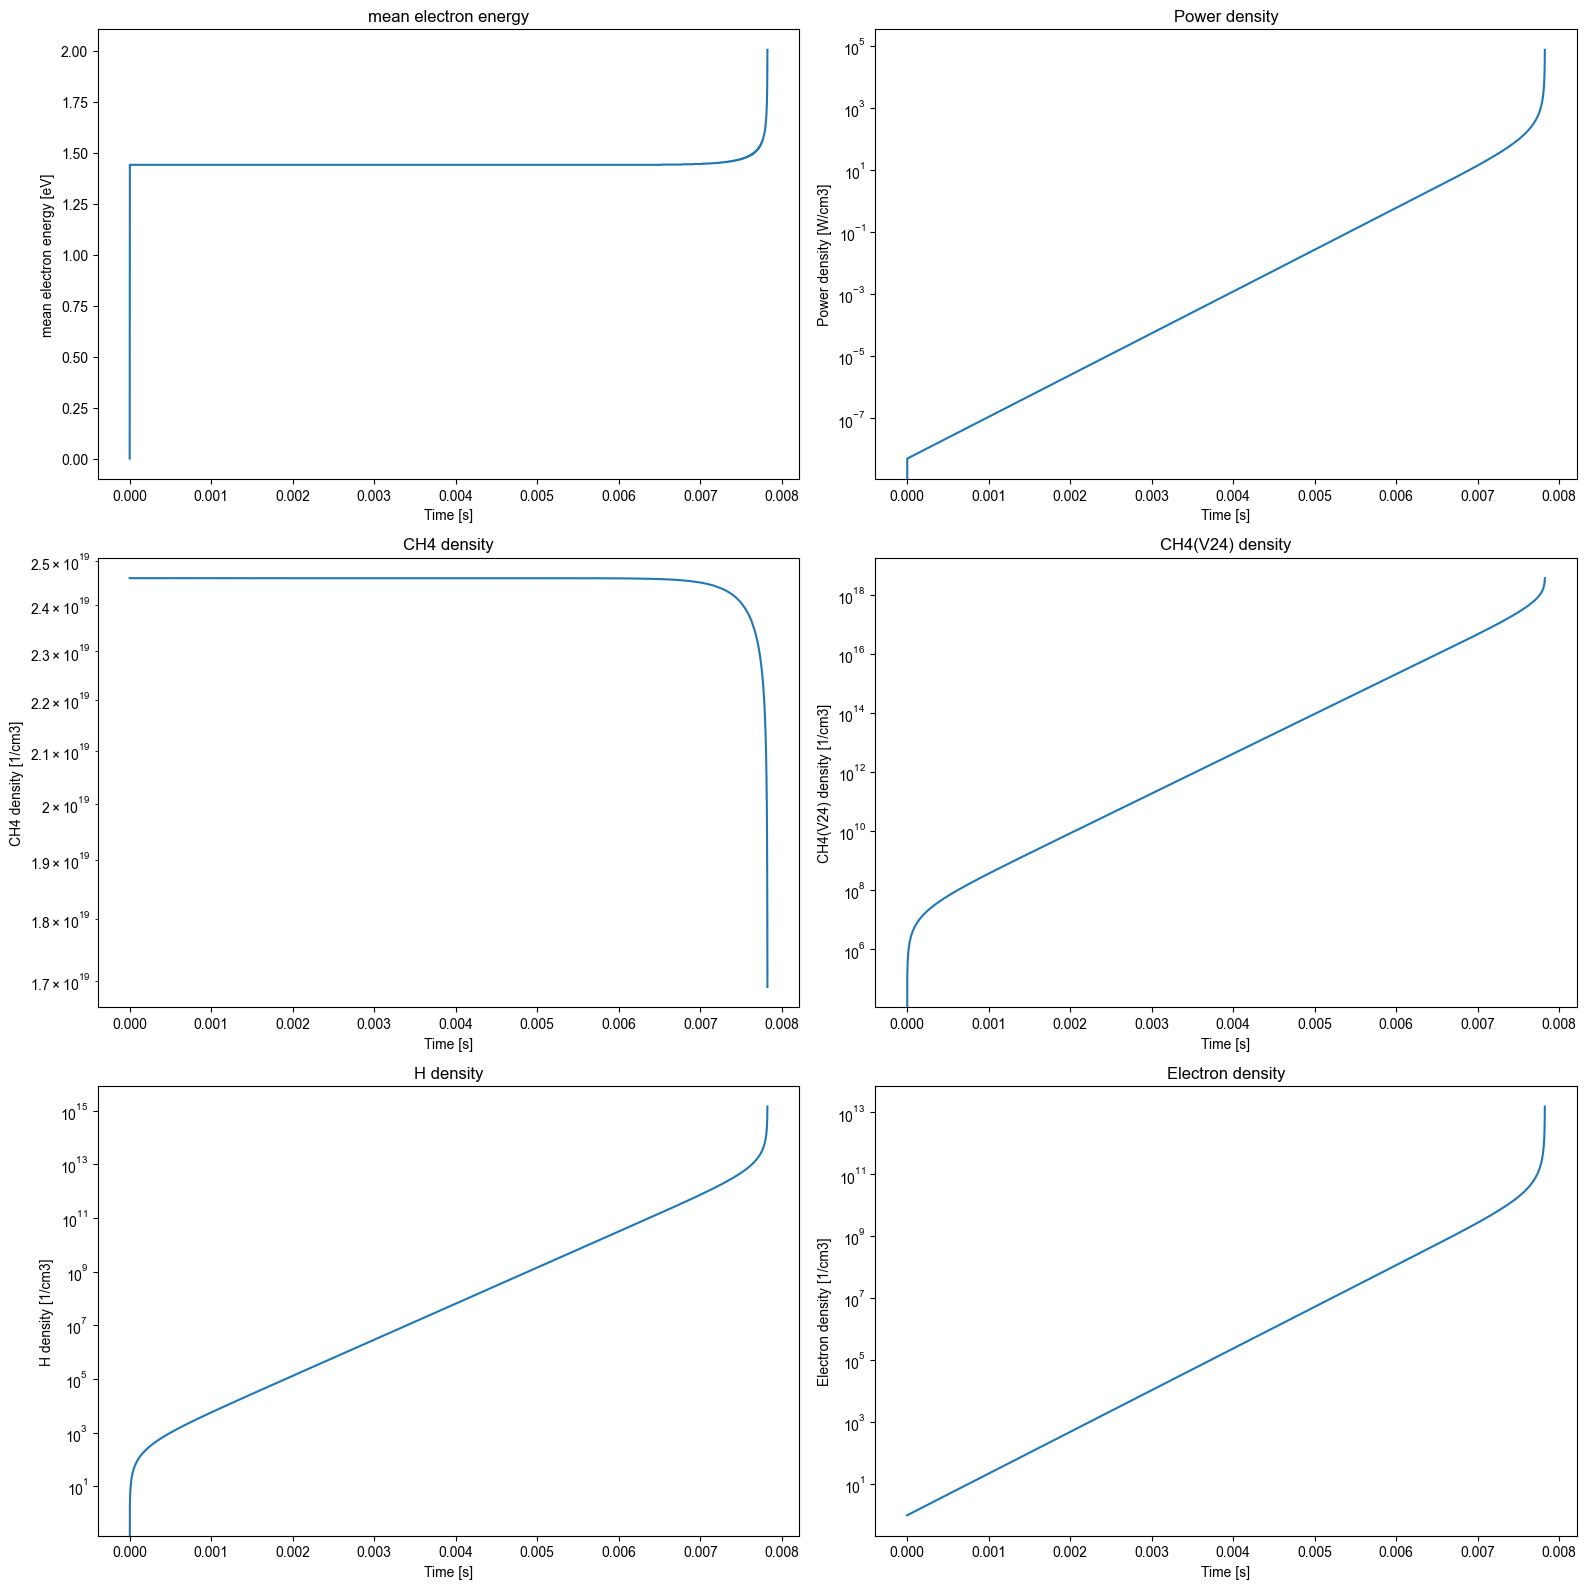

In [60]:
fig, axs = plt.subplots(3,2,figsize=(16,16))

axs[0,0].plot(df_cd['Time [s]'],df_cd['Electron temperature [K]'] / const.e * const.k)
axs[0,0].set_xlabel('Time [s]')
axs[0,0].set_ylabel('mean electron energy [eV]')
axs[0,0].set_title('mean electron energy')

axs[0,1].plot(df_sp['Time [s]'],df_cd['Power density [W/cm3]'])
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel('Time [s]')
axs[0,1].set_ylabel('Power density [W/cm3]')
axs[0,1].set_title('Power density')

axs[1,0].plot(df_sp['Time [s]'],df_sp['CH4'])
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel('Time [s]')
axs[1,0].set_ylabel('CH4 density [1/cm3]')
axs[1,0].set_title('CH4 density')

axs[1,1].plot(df_sp['Time [s]'],df_sp['CH4(V24)'])
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel('Time [s]')
axs[1,1].set_ylabel('CH4(V24) density [1/cm3]')
axs[1,1].set_title('CH4(V24) density')

axs[2,0].plot(df_sp['Time [s]'],df_sp['H'])
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('Time [s]')
axs[2,0].set_ylabel('H density [1/cm3]')
axs[2,0].set_title('H density')

axs[2,1].plot(df_sp['Time [s]'],df_sp['E'])
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel('Time [s]')
axs[2,1].set_ylabel('Electron density [1/cm3]')
axs[2,1].set_title('Electron density')

plt.tight_layout()
plt.show()

In [61]:
reactions

['bolsig:CH4->CH4(V24)',
 'bolsig:CH4->CH4(V13)',
 'bolsig:C2H6->C2H6(V24)',
 'bolsig:C2H6->C2H6(V13)',
 'bolsig:C2H4->C2H4(V1)',
 'bolsig:C2H4->C2H4(V2)',
 'bolsig:C2H2->C2H2(V5)',
 'bolsig:C2H2->C2H2(V2)',
 'bolsig:C2H2->C2H2(V13)',
 ' bolsig:C3H8->C3H8(V1)',
 ' bolsig:C3H8->C3H8(V2)',
 ' bolsig:C3H6->C3H6(V)',
 ' bolsig:CH4->CH3H',
 ' bolsig:CH4->CH2H2',
 ' bolsig:CH4->CHH2H',
 ' bolsig:CH3->CH2H',
 ' bolsig:CH3->CHH2',
 ' bolsig:CH2->CHH',
 ' bolsig:CH4->CH4^+',
 ' bolsig:CH4->HCH3^+',
 ' bolsig:CH4->H2CH2^+',
 ' bolsig:CH4->H2HCH^+',
 ' bolsig:CH3->CH3^+',
 ' bolsig:CH3->HCH2^+',
 ' bolsig:CH3->H2CH^+',
 ' bolsig:CH2->CH2^+',
 ' bolsig:CH2->HCH^+',
 ' bolsig:CH->CH^+',
 ' bolsig:C2H6->C2H5H',
 ' bolsig:C2H6->C2H4H2',
 ' bolsig:C2H6->C2H3H2H',
 ' bolsig:C2H6->C2H2H2H2',
 ' bolsig:C2H6->CH4CH2',
 ' bolsig:C2H6->CH3CH3',
 ' bolsig:C2H5->C2H4H',
 ' bolsig:C2H5->C2H3H2',
 ' bolsig:C2H5->C2H3HH',
 ' bolsig:C2H5->C2H2H2H',
 ' bolsig:C2H5->CH4CH',
 ' bolsig:C2H5->CH3CH2',
 ' bolsig:C2H4->